# Generate videos

Let's generate two videos, reconstructed from image and audio. Dreamtalk will animate the face, matching lips movements to words and conveying emotional aspect of the video, where appropriate.


Let's see the inputs to the method. 

Our first subject is a young Albert Einstein.


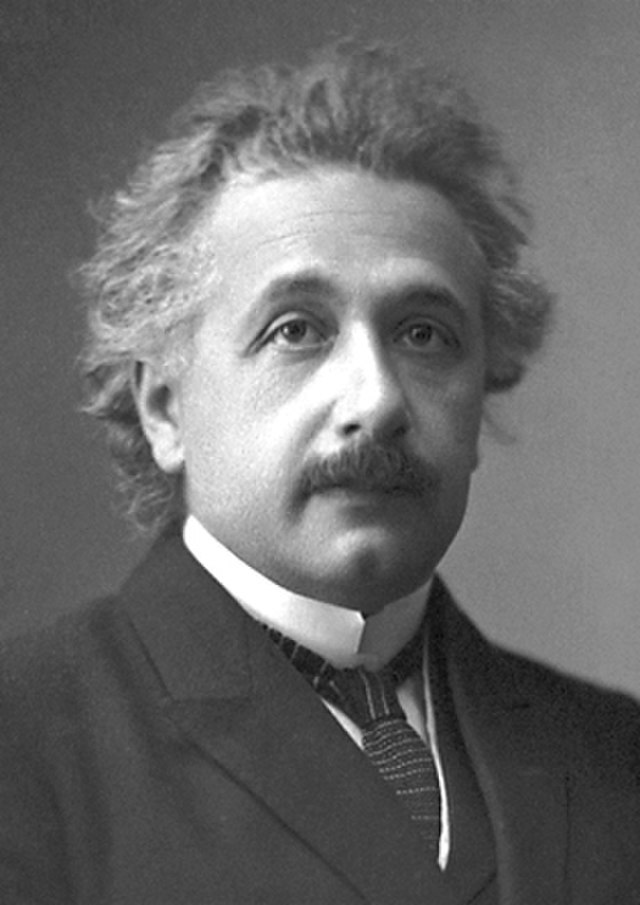

In [1]:
from IPython.display import display, Image

image = Image(filename='./img/einstein.jpg', width=256)
display(image)

Let's go with this quote from one of his speeches:
> Our age is proud of the progress it has made in men's intellectual development. The search and striving for truth and knowledge is one of the highest of men's qualities

In [2]:
from IPython.display import Audio

eisntein_audio = Audio(filename='./audio/einstein.wav')
display(eisntein_audio)

In [3]:
from video_generator import generate
import time

time_einstein_start = time.time()
generate("einstein", "einstein", "neutral", "male")
generation_time_einstein_gpu = time.time() - time_einstein_start

/home/ubuntu/demos/dreamtalk-demo/.venv_dreamtalk/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Examine now the output at `./output/einstein.mp4`.

Let's try now with Marilyn Monroe. Here's the base image.


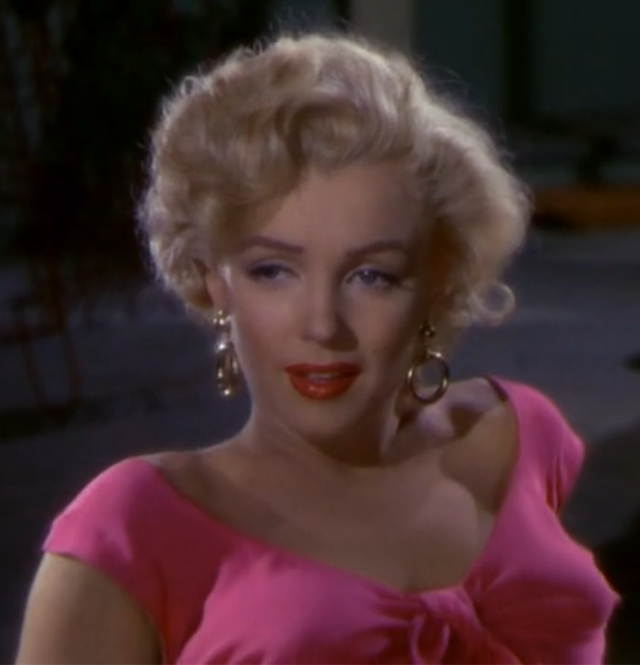

In [4]:
image = Image('./img/marilyn.jpg', width=256)
display(image)

We will use this audio from a rare interview. This corresponds to a sad episode at the beginning of Marilyn's career. Here's the quote:
>  I didn't have an opportunity to do anything, actually, during the year that I was there at 20th Century Fox the first time. Except one part in Scudahoo Scudahay, and I was cut out of it. And then they dropped me.

In [5]:
audio = Audio(filename='./audio/marilyn.wav')
display(audio)

Let's generate a video now.

In [6]:
time_marilyn_start = time.time()
generate("marilyn", "marilyn", "sad", "female")
generation_time_marilyn_gpu = time.time() - time_marilyn_start

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Some weights of the model checkpoint at jonatasgrosman/wav2vec2-large-xlsr-53-english were not used when initializing Wav2Vec2Model: ['lm_head.weight', 'lm_head.bias']
- This IS expected if you are initializing Wav2Vec2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/home/ubuntu/demos/dreamtalk-demo/.venv_dreamtalk/lib/python3.7/site-packages/torch/nn/functional.py:4228: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid beh

The output will be available at `./output/marilym.mp4`

## Generation time

Let's explore the generation time of the videos with GPU acceleration with regards to CPU only.

In [7]:
time_einstein_start = time.time()
generate("einstein", "einstein", "neutral", "male", device="cpu")
generation_time_einstein_cpu = time.time() - time_einstein_start

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [8]:
time_marilyn_start = time.time()
generate("marilyn", "marilyn", "sad", "female", device="cpu")
generation_time_marilyn_cpu = time.time() - time_marilyn_start

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Let's plot the generation time, normalized by sequence length.

In [9]:
import numpy as np

gen_times = np.array([generation_time_einstein_gpu, generation_time_marilyn_gpu, generation_time_einstein_cpu, generation_time_marilyn_cpu])
clip_times = np.array([15.0, 12.0, 15.0, 12.0])
performance_data = {
    "Subject": ["Einstein", "Marilyn", "Einstein", "Marilyn",],
    "Generation time (seconds)": gen_times,
    "Clip time (seconds)": clip_times,
    "Generation efficiency": gen_times / clip_times,
    "Device": ["GPU", "GPU", "CPU", "CPU"]
}

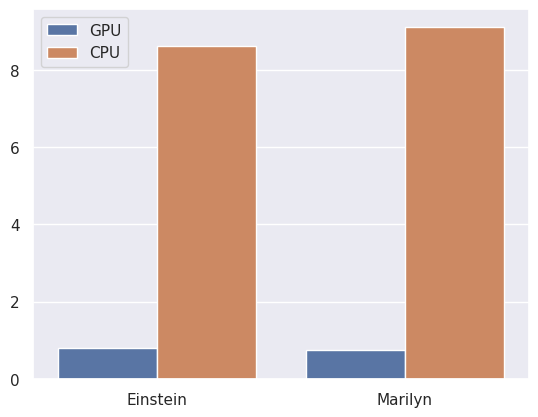

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
sns.barplot(performance_data, x="Subject", y="Generation efficiency", hue="Device")
plt.show()

By using GPU acceleration with A100, we can obtain nearly a 1-to-1 efficiency (1 second of video generated in 1 second of processing time), as opposed to around 1-to-8 with CPU.

# References
* [Albert Einstein's image](https://commons.wikimedia.org/wiki/File:Albert_Einstein_(Nobel).png)
* [Albert Einstein's audio](https://commons.wikimedia.org/wiki/File:03_ALBERT_EINSTEIN.ogg)
* [Marilyn Monroe's image](https://commons.wikimedia.org/wiki/File:Marilyn_Monroe_Niagara_(cropped).png)
* [Marilyn Monroe's audio](https://archive.org/details/marilyn-monroe_202112/18+-+Awards.mp3)